In [22]:
# import os
import sys
# from pathlib import Path

# module_path = os.path.abspath(os.path.join('../'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

import json
import pickle
import numpy as np
# import pandas as pd
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


# from tqdm import tqdm
# from pathlib import Path
# from scipy.ndimage import gaussian_filter
# from matplotlib.colors import LogNorm

# sys.path.append("code/preprocessing/utils/")
# from segment2D     import *
# from segment3D     import *
# from file_handling import *

sys.path.append("code/analysis/utils/")
from data_class import AutocorrelationData, SegmentationData#, VariationData,

sys.path.append("code/visualization/")
from plot_time_evolution import plot_cell_number
# from variation_functions import spatial_variation, global_density

# pix_to_um = get_pixel_size()
frame_to_h = 1 / 12

In [23]:
datasets = ["holomonitor_20240301_B1-4", 
            "holomonitor_20240301_B2-2", 
            "holomonitor_20240301_B2-6",
            "holomonitor_20240317_B1-1",
            "holomonitor_20240319_A1-9",
            "holomonitor_20240319_A1-13",
            "holomonitor_20240319_A1-16",
            "holomonitor_20240319_A1-18",
            "holomonitor_20240319_B1-11"]


cmap_20240301 = mpl.colormaps['Greens'](np.linspace(0.5, 0.9, 3))
cmap_20240317 = mpl.colormaps['Oranges'](np.linspace(0.5, 0.9, 1))
cmap_20240319 = mpl.colormaps['Blues'](np.linspace(0.5, 0.9, 5))
colors = np.concatenate([cmap_20240301,
                         cmap_20240317,
                         cmap_20240319])

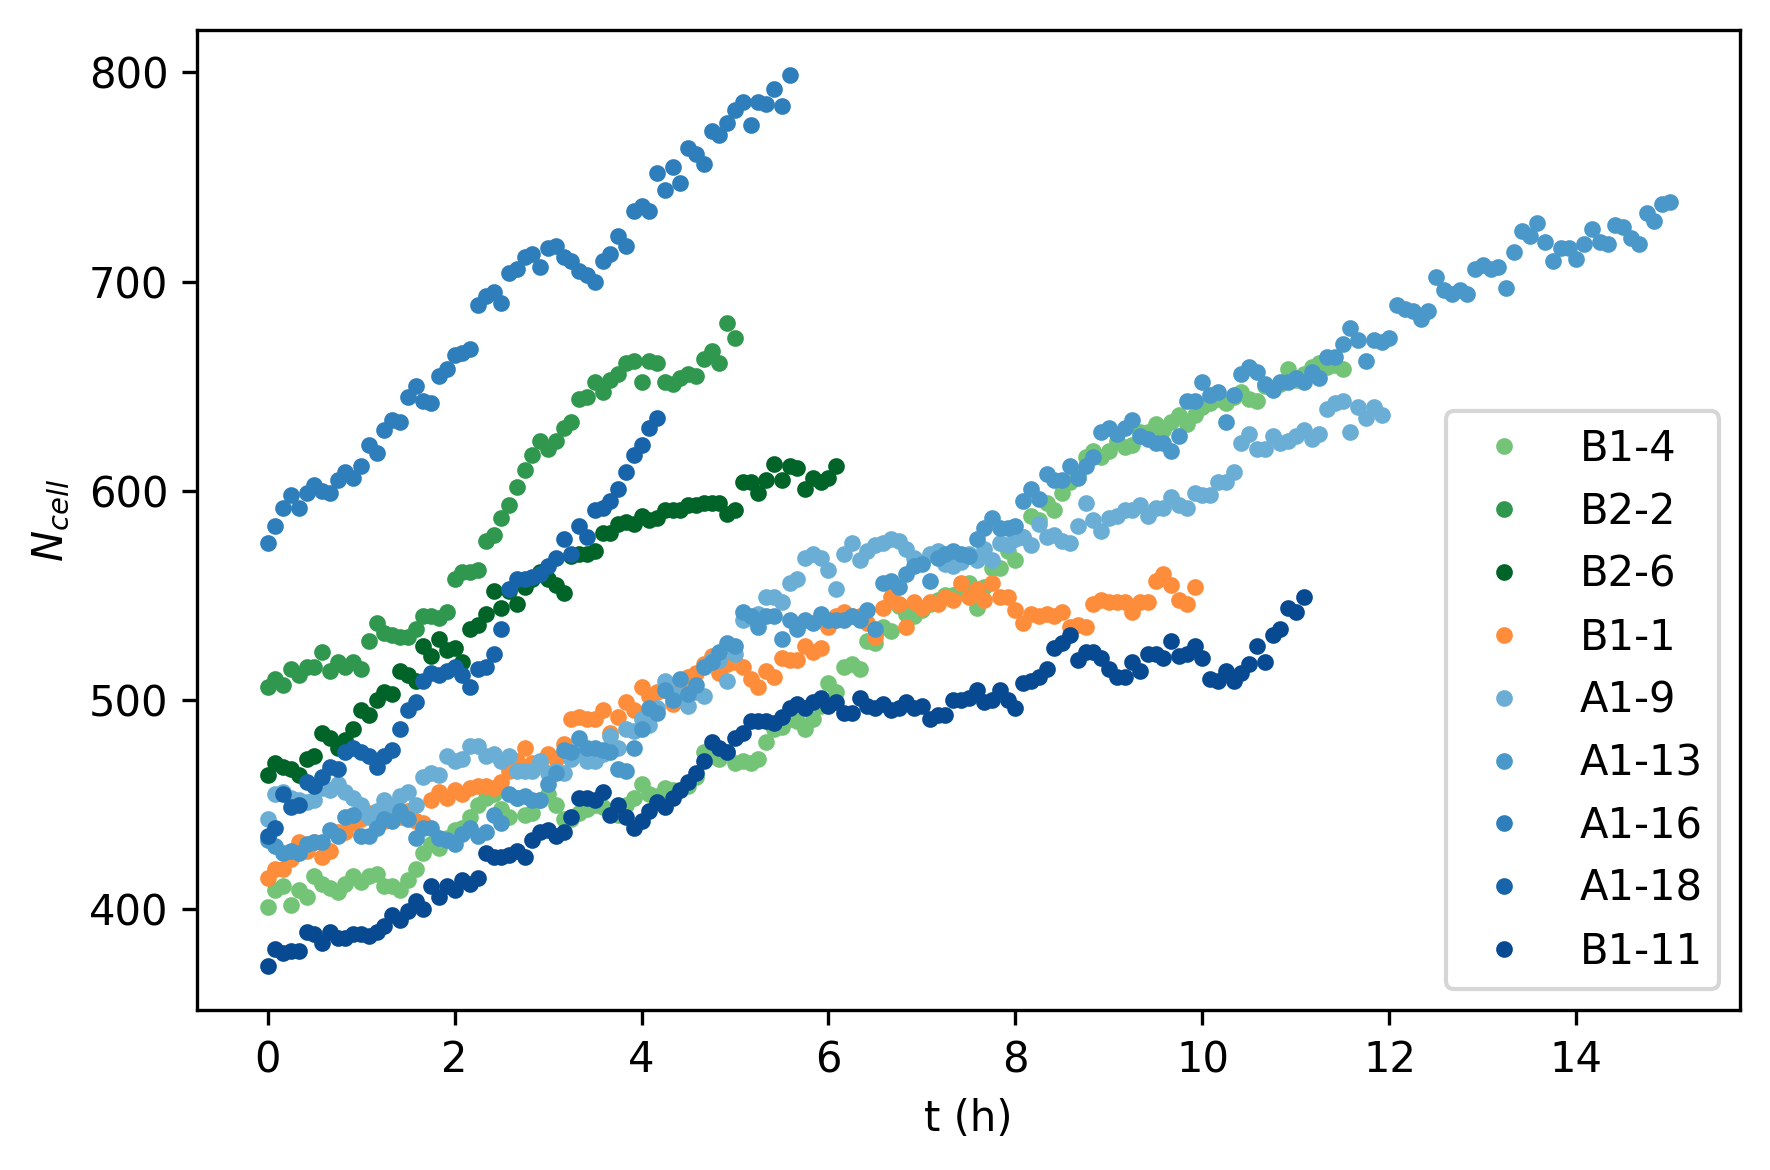

In [ ]:
plt.figure(figsize=(3 2), dpi=300)
plt.xlabel("t (h)")
plt.ylabel(r"$N_{cell}$")

i = 0
for dataset in datasets:
    with open(f"data/experimental/processed/{dataset}/raw_cell_props.p", 'rb') as f:
        cellprop = pickle.load(f)

    config   = json.load(open(f"data/experimental/configs/{dataset}.json"))
    fmin     = config['segmentation']['fmin']

    Ncells = [len(cells) for cells in cellprop]
    hour = np.arange(len(cellprop)) * frame_to_h

    plt.plot(hour, Ncells, '.', c=colors[i], label=dataset.split("_")[-1])

    i += 1

plt.tight_layout()
plt.legend()
plt.savefig("raw_cell_number_open.png")